<a href="https://colab.research.google.com/github/MohamedFAR00K/Farook/blob/main/BRINJAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np


In [7]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=10

In [8]:
images_dataset=tf.keras.preprocessing.image_dataset_from_directory(
 '/content/drive/MyDrive/Dataset',
 shuffle=True,
 image_size=(IMAGE_SIZE,IMAGE_SIZE),
 batch_size=BATCH_SIZE,

)

Found 5790 files belonging to 2 classes.


In [9]:
class_names=images_dataset.class_names
class_names

['1', 'brinjalleaf']

In [10]:
len(images_dataset)

181

In [11]:
for image_batch,label_batch in images_dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [12]:
for image_batch, label_batch in images_dataset.take(1):
    print(image_batch[0].numpy())

[[[165. 164. 172.]
  [170. 169. 177.]
  [174. 173. 181.]
  ...
  [169. 166. 173.]
  [170. 167. 174.]
  [172. 169. 176.]]

 [[164. 163. 171.]
  [169. 168. 176.]
  [173. 172. 180.]
  ...
  [168. 165. 172.]
  [169. 166. 173.]
  [169. 166. 173.]]

 [[162. 161. 169.]
  [166. 165. 173.]
  [169. 168. 176.]
  ...
  [168. 165. 172.]
  [167. 164. 171.]
  [166. 163. 170.]]

 ...

 [[126. 121. 118.]
  [124. 119. 116.]
  [124. 119. 116.]
  ...
  [128. 122. 124.]
  [128. 122. 124.]
  [124. 118. 120.]]

 [[123. 118. 115.]
  [125. 120. 117.]
  [129. 124. 121.]
  ...
  [126. 120. 122.]
  [123. 117. 119.]
  [117. 111. 113.]]

 [[117. 112. 109.]
  [123. 118. 115.]
  [131. 126. 123.]
  ...
  [121. 115. 117.]
  [117. 111. 113.]
  [110. 104. 106.]]]


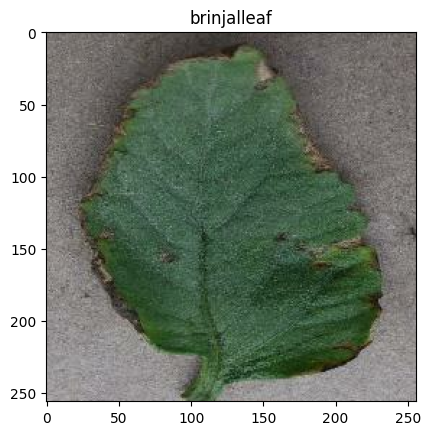

In [13]:
for image_batch, label_batch in images_dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])

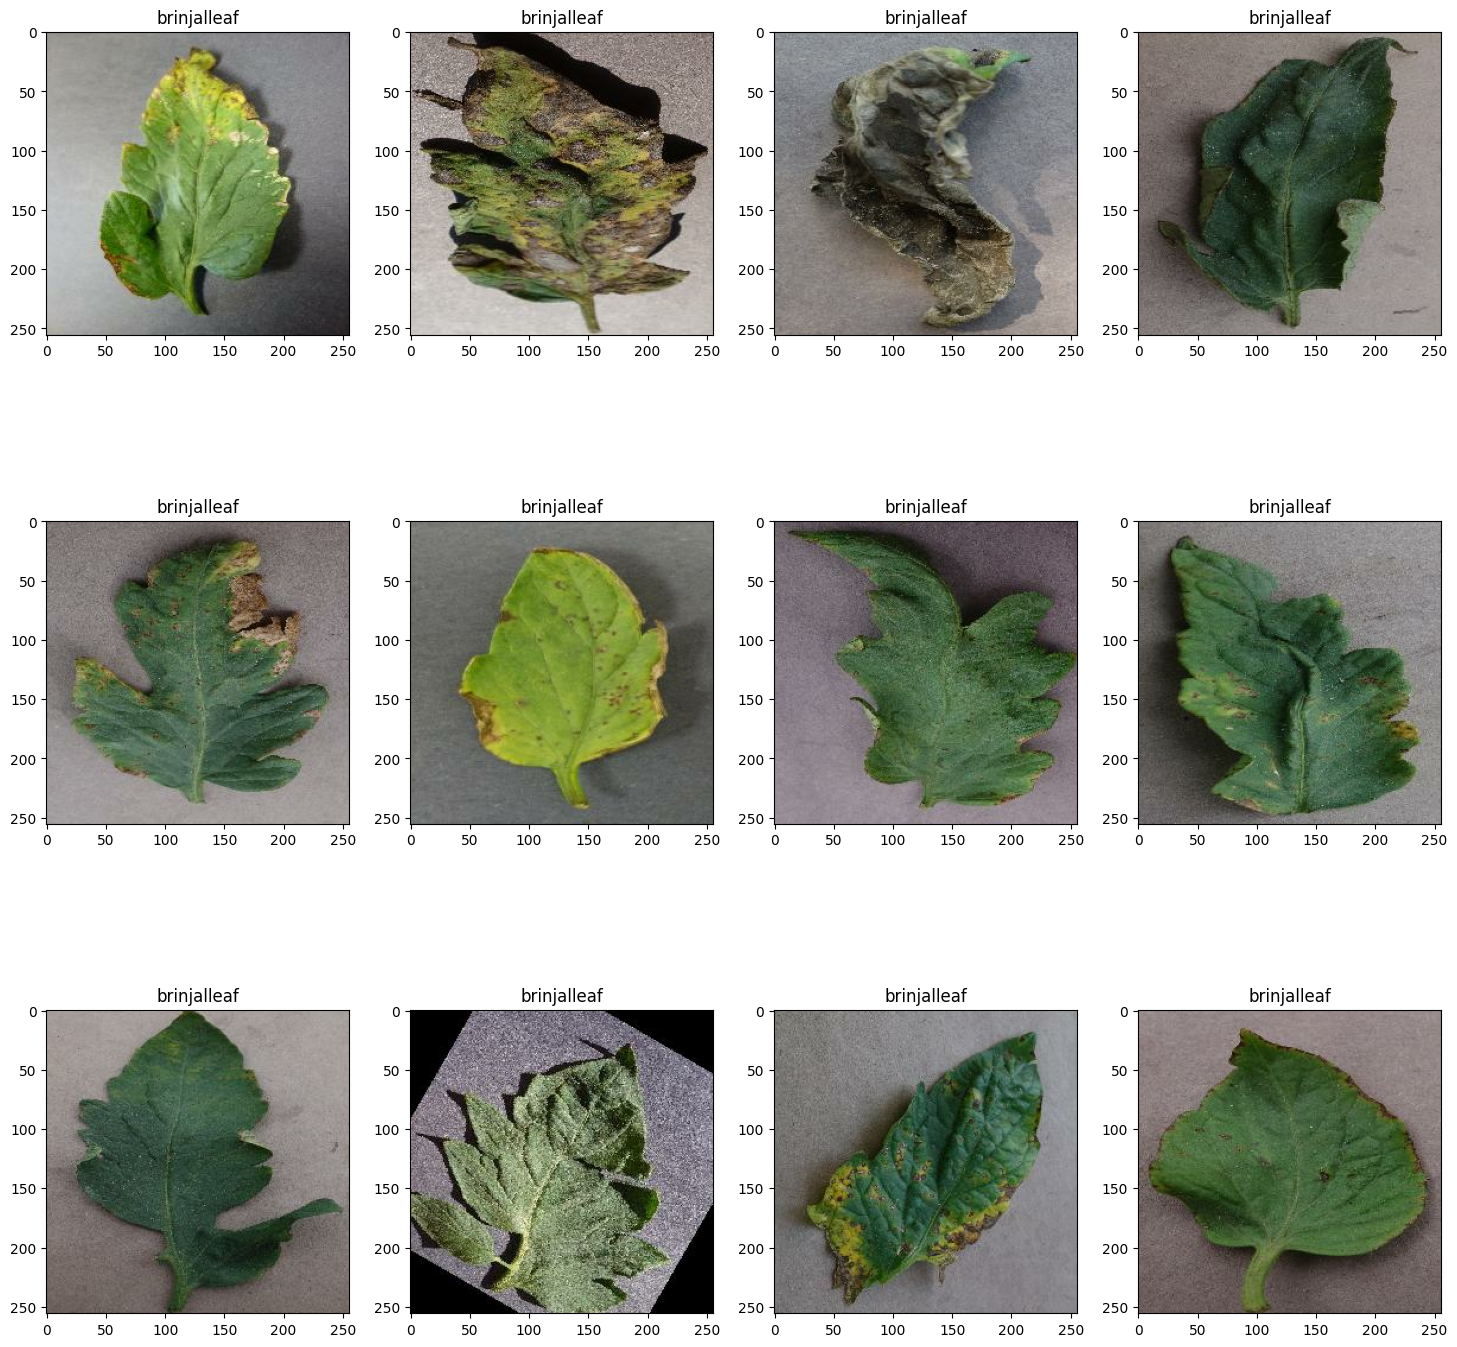

In [14]:
plt.figure(figsize=(18,18))
for image_batch, label_batch in images_dataset.take(1):
    for i in range (12):
        ax=plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])


In [15]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)

    train_size= int(train_split* ds_size)
    val_size=int(val_split* ds_size)

    train_ds=ds.take(train_size)

    val_ds=ds.skip(train_size).take(val_size)

    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(images_dataset)

In [17]:
print(len(train_ds),len(val_ds),len(test_ds))

144 18 19


In [18]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [19]:
resize_and_rescale=tf.keras.Sequential([

    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [20]:
data_augmentation=tf.keras.Sequential([

    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [21]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D (32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dense(n_classes, activation='softmax'),
])

In [22]:
model.build(input_shape=input_shape)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 32)          0         
 g2D)                                                 

In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False ),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/10
 10/144 [=>............................] - ETA: 6:23 - loss: 0.5798 - accuracy: 1.0000

In [ ]:
history

In [ ]:
print(history.params)

In [ ]:
print(history.history.keys())

In [ ]:
len(history.history['accuracy'])

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']


In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Traning loss ')
plt.plot(range(EPOCHS),val_loss,label='Validation loss ')
plt.legend(loc='upper right')
plt.title('Traning and Validation loss')



In [ ]:
for image_batch,label_batch in test_ds.take(1):
  print(image_batch[0])